[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drdave-teaching/OPIM5509Files/blob/main/OPIM5509_Module2_Files/1_MulticlassClassification_Iris_structured_data.ipynb)

# Dense Neural Networks: Multiclass Classification
----------------------------------
**Dr. Dave Wanik**

Let's try to fit a dense neural network with the Iris dataset.

In [ ]:
# for reading data
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

!pip install scikeras
from scikeras.wrappers import KerasClassifier # updated 2023

# from keras.utils import np_utils
from keras.utils import to_categorical

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# useful link: https://shrikar.com/deep-learning-with-keras-and-python-for-multiclass-classification/
# useful link: https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

In [ ]:
# # read in the data
# url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv'
# df = pd.read_csv(url)
# df.info()

In [ ]:
# # read from shareable link
# # https://drive.google.com/file/d/1hcnnt2HJ6Iiv6yJJrk0thlPSibu_1q3x/view?usp=sharing
# !gdown 1hcnnt2HJ6Iiv6yJJrk0thlPSibu_1q3x
# df = pd.read_csv('Iris.csv')

Downloading...
From: https://drive.google.com/uc?id=1hcnnt2HJ6Iiv6yJJrk0thlPSibu_1q3x
To: /content/Iris.csv
100% 4.61k/4.61k [00:00<00:00, 5.08MB/s]


In [ ]:
# Link to the data file on Github
url = "https://raw.githubusercontent.com/drdave-teaching/OPIM5509Files/refs/heads/main/OPIM5509_Module2_Files/Iris.csv"

# retrieve the data and build a dataframe
df = pd.read_csv(url)

df.shape

(150, 5)

In [ ]:
# show the head
df.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# show counts per species
df['iris'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: iris, dtype: int64

In [ ]:
# don't forget to shuffle! this way our data has some order...
df = df.sample(frac=1).reset_index(drop=True)
df.head()
# link: https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.8,1.5,0.3,Iris-setosa
1,6.7,3.1,4.7,1.5,Iris-versicolor
2,5.0,3.2,1.2,0.2,Iris-setosa
3,5.6,2.5,3.9,1.1,Iris-versicolor
4,7.7,3.8,6.7,2.2,Iris-virginica


In [ ]:
# split into X and Y
Y = df['iris']
X = df.drop(['iris'], axis=1)

print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [ ]:
# convert to numpy arrays
X = np.array(X)

In [ ]:
# show Y
Y.head()

0        Iris-setosa
1    Iris-versicolor
2        Iris-setosa
3    Iris-versicolor
4     Iris-virginica
Name: iris, dtype: object

In [ ]:
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [ ]:
encoded_Y

array([0, 1, 0, 1, 2, 1, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2,
       0, 1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0,
       0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1, 0, 1, 1, 1, 2,
       0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 2,
       0, 0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 0, 0, 2, 1,
       2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 0])

In [ ]:
print(dummy_y.shape)
dummy_y

(150, 3)


array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [ ]:
# build a model
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(3, activation='softmax')) # output
model.summary()

# make sure in a multiclass problem that you have one output node per target class
# and use a 'softmax' activation function which forces your model to split
# it's prediction among 3 classes (all adds up to 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model.compile(optimizer='rmsprop', # use rmsprop or Adam
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

In [ ]:
# fit the model
history = model.fit(X,
                    dummy_y,
                    epochs=40,
                    batch_size=10,
                    validation_split=0.2, # last 20% of data used as validation
                    shuffle=True)

## Callbacks (Early Stopping, return best weights, patience)
Remember that you will just use early_stopping in the future - no need to hard-code epochs.

In [ ]:
# we will keep the same model architecture as before,
# but we will make this a little simpler...

import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in
# the validation loss for 10 consecutive epochs.
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=10, # you can play with this!
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(X,
                    dummy_y,
                    callbacks=[es],
                    epochs=1000000, # you can set this to a big number!
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/1000000
12/12 [==============================] - 1s 24ms/step - loss: 1.9784 - accuracy: 0.0083 - val_loss: 1.8260 - val_accuracy: 0.0333
Epoch 2/1000000
12/12 [==============================] - 0s 7ms/step - loss: 1.6986 - accuracy: 0.0417 - val_loss: 1.5819 - val_accuracy: 0.2000
Epoch 3/1000000
12/12 [==============================] - 0s 5ms/step - loss: 1.5435 - accuracy: 0.2167 - val_loss: 1.4122 - val_accuracy: 0.2000
Epoch 4/1000000
12/12 [==============================] - 0s 7ms/step - loss: 1.4243 - accuracy: 0.2333 - val_loss: 1.2915 - val_accuracy: 0.2667
Epoch 5/1000000
12/12 [==============================] - 0s 8ms/step - loss: 1.3251 - accuracy: 0.2917 - val_loss: 1.1962 - val_accuracy: 0.4333
Epoch 6/1000000
12/12 [==============================] - 0s 5ms/step - loss: 1.2341 - accuracy: 0.3667 - val_loss: 1.1302 - val_accuracy: 0.5667
Epoch 7/1000000
12/12 [==============================] - 0s 4ms/step - loss: 1.1479 - accuracy: 0.3750 - val_loss: 1.0556 - val_a

## Evaluate The Model

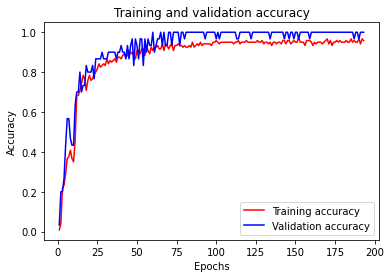

In [ ]:
# learning curve
import matplotlib.pyplot as plt

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

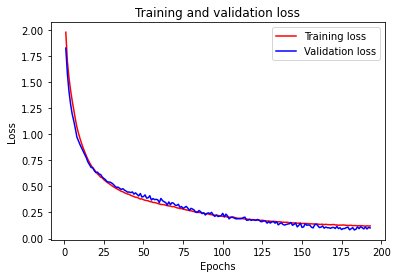

In [ ]:
# learning curve
import matplotlib.pyplot as plt

# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "r" is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how the model did!
preds = model.predict(X)
print(preds.shape)

# i'm spreading that prediction across three nodes and they sum to 1
print(preds[0])

# sum it up! see how probability mass (1) is spread over three preds?
np.sum(preds[0])


(150, 3)
[9.9960560e-01 3.9446677e-04 1.9940734e-09]


1.0000001

In [ ]:
# here is dummy_y
dummy_y

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [ ]:
# here is what argmax does
dummy_y.argmax(axis=1)

array([0, 1, 0, 1, 2, 1, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2,
       0, 1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0,
       0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1, 0, 1, 1, 1, 2,
       0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 2,
       0, 0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 0, 0, 2, 1,
       2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 0])

In [ ]:
preds

In [ ]:
preds.argmax(axis=1)

In [ ]:
# here it is! almost a perfect prediction
# actual is left, predicted is top
# names can be found by inspecting Y
matrix = confusion_matrix(dummy_y.argmax(axis=1), preds.argmax(axis=1))
matrix

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  0, 50]])

In [ ]:
# more detail on how well things were predicted
print(classification_report(dummy_y.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.94      0.97        50
           2       0.94      1.00      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



# On Your Own
Like I say at the end of the video - your job as a data scientist is to help people believe in your model. You need to make sure folks don't doubt your work!

You should update this script to have a train_test_split where 30% of the data is used for testing. Don't forget to use a random seed.

Then, train your model on X_train and y_train with a val_split equal to 0.2 and shuffle = True. When you do this, a chunk of the training partition is being used as a feedback signal to ensure your model isn't overfitting and generalizes to unseen data.

As a further quality check, you then APPLY this fitted model to the test data via `model.predict(X_test)` and check to see that you get the same error metrics. This is the way to do it for any type of DL project!

# Other key take-aways
* Note that you had to use a LabelEncoder() here and that it sorted the categories in alphabetical order and then encoded them inplace with 0, 1, 2
* You had to make dummy variables for Y (and you didn't need to do this for binary classification problems - this is because in binary classification you had 2 categories and one output node with a SIGMOID activation function which made predictions between 0 and 1).
* The output node of your neural network had 3 nodes - why? Because you have three types of flowers that you are trying to predict. Note that you are using a softmax instead of a sigmoid activation function.
  * You also are using `categorical_crossentropy` to split the predicted probability mass among your N categories.